In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn
import random
import importlib
resources = importlib.import_module("resources")
import resources.finiteMDP as fmdp
import resources.infMDP as imdp
from itertools import product
random.seed(2018)
from ipywidgets import IntProgress
from IPython.display import display


%matplotlib inline



In [2]:
# GridWorld

states = list(range(22)) ; states.append('inf')
actions = ["AU","AD","AL","AR"]
action_id = {"AU":0,"AD":1,"AL":2,"AR":3}
action_dict= {"AU":[.8,0,.05,.05,.1],
              "AL":[.05,.05,.8,0,.1],
              "AR":[.05,.05,0,.8,.1],
              "AD":[0,.8,.05,.05,.1]}
                #   U D L R C
transition_dict = {0:[0,5,0,1,0],
                   1:[0,5,-1,1,0],
                   2:[0,5,-1,1,0],
                   3:[0,5,-1,1,0],
                   4:[0,5,-1,0,0],
                   5:[-5,5,0,1,0],
                   6:[-5,5,-1,1,0],
                   7:[-5,0,-1,1,0],
                   8:[-5,4,-1,1,0],
                   9:[-5,4,-1,0,0],
                  10:[-5,4,0,1,0],
                  11:[-5,4,-1,0,0],
                  12:[-4,4,0,1,0],
                  13:[-4,4,-1,0,0],
                  14:[-4,4,0,1,0],
                  15:[-4,4,-1,0,0],
                  16:[-4,5,0,1,0],
                  17:[-4,None,-1,0,0],
                  18:[-4,0,0,1,0],
                  19:[-4,0,-1,1,0],
                  20:[0,0,-1,1,0],
                  21:[-5,0,-1,None,0]}
def transition_func(state,action):
    direction = np.random.choice(list(range(5)),p = action_dict[action])
    change = transition_dict[state][direction]
    if change is None:
        return 'inf'
    else:
        return state + change
def reward_func(state,action,newstate):
    if newstate ==20:
        return -10
    elif newstate == 'inf':
        return 10
    else:
        return 0
def policy_random(state,actions):
    return random.choice(actions)
myMDP = fmdp.MDP(states,actions,transition_func,reward_func,lambda : 0, .9, policy_random)

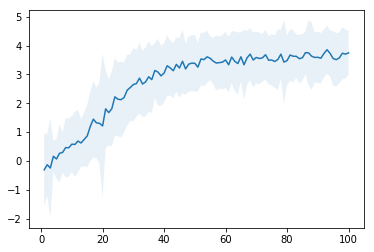

In [3]:
episodes = 100
repetitions = 100
y = np.zeros((episodes,repetitions))
j=0
while j<repetitions:
    i = 0
    #for G in fmdp.Q_Lambda_tabular(.4,episodes,len(states)-1,len(actions),action_id,.1,myMDP):
    #for G in fmdp.Q_tabular(episodes,len(states)-1,len(actions),action_id,.1,myMDP):
    for G in fmdp.actor_critic(.25,.25,.1,episodes,len(states)-1,len(actions),action_id,myMDP):
        y[i,j] = G
        i+=1
    j+=1

std = np.std(y,axis = 1)
mean = np.mean(y,axis = 1)

plt.plot(range(1,episodes+1),np.mean(y,axis = 1))
plt.fill_between(range(1,episodes+1), mean-std, mean+std,alpha  = .1)

name = 'GRIDWORLD_ACTOR_CRITIC'
plt.savefig('results/'+name+'.jpg')


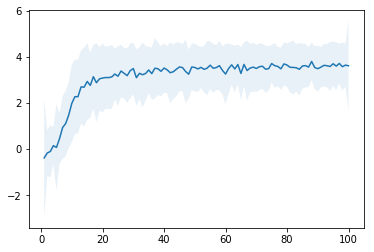

In [4]:
episodes = 100
repetitions = 100
y = np.zeros((episodes,repetitions))
j=0
while j<repetitions:
    i = 0
    #for G in fmdp.Q_Lambda_tabular(.4,episodes,len(states)-1,len(actions),action_id,.1,myMDP):
    for G in fmdp.Q_tabular(episodes,len(states)-1,len(actions),action_id,.1,myMDP):
        y[i,j] = G
        i+=1
    j+=1

std = np.std(y,axis = 1)
mean = np.mean(y,axis = 1)

plt.plot(range(1,episodes+1),np.mean(y,axis = 1))
plt.fill_between(range(1,episodes+1), mean-std, mean+std,alpha  = .1)

name = 'GRIDWORLD_Q'
plt.savefig('results/'+name+'.jpg')


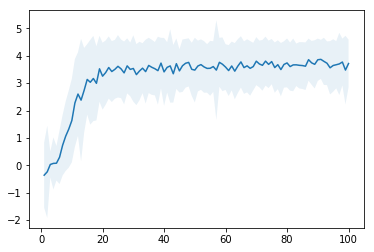

In [5]:
episodes = 100
repetitions = 100
y = np.zeros((episodes,repetitions))
j=0
while j<repetitions:
    i = 0
    #for G in fmdp.Q_Lambda_tabular(.4,episodes,len(states)-1,len(actions),action_id,.1,myMDP):
    for G in fmdp.Sarsa_tabular(episodes,len(states)-1,len(actions),action_id,.1,myMDP):
    #for G in fmdp.actor_critic(.25,.25,.1,episodes,len(states)-1,len(actions),action_id,myMDP):
        y[i,j] = G
        i+=1
    j+=1

std = np.std(y,axis = 1)
mean = np.mean(y,axis = 1)

plt.plot(range(1,episodes+1),np.mean(y,axis = 1))
plt.fill_between(range(1,episodes+1), mean-std, mean+std,alpha  = .1)

name = 'GRIDWORLD_Sarsa'
plt.savefig('results/'+name+'.jpg')


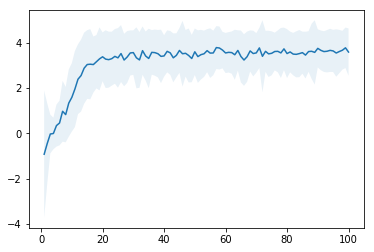

In [6]:
episodes = 100
repetitions = 100
y = np.zeros((episodes,repetitions))
j=0
while j<repetitions:
    i = 0
    for G in fmdp.Q_Lambda_tabular(.4,episodes,len(states)-1,len(actions),action_id,.1,myMDP):
    #for G in fmdp.Q_tabular(episodes,len(states)-1,len(actions),action_id,.1,myMDP):
    #for G in fmdp.actor_critic(.25,.25,.1,episodes,len(states)-1,len(actions),action_id,myMDP):
        y[i,j] = G
        i+=1
    j+=1

std = np.std(y,axis = 1)
mean = np.mean(y,axis = 1)

plt.plot(range(1,episodes+1),np.mean(y,axis = 1))
plt.fill_between(range(1,episodes+1), mean-std, mean+std,alpha  = .1)

name = 'GRIDWORLD_Q_LAMBDA'
plt.savefig('results/'+name+'.jpg')


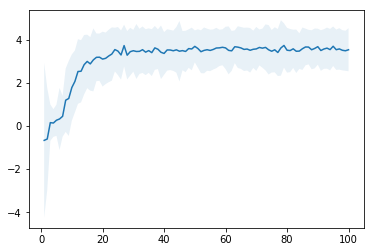

In [7]:
episodes = 100
repetitions = 100
y = np.zeros((episodes,repetitions))
j=0
while j<repetitions:
    i = 0
    for G in fmdp.Sarsa_Lambda_tabular(.4,episodes,len(states)-1,len(actions),action_id,.1,myMDP):
    #for G in fmdp.Q_tabular(episodes,len(states)-1,len(actions),action_id,.1,myMDP):
    #for G in fmdp.actor_critic(.25,.25,.1,episodes,len(states)-1,len(actions),action_id,myMDP):
        y[i,j] = G
        i+=1
    j+=1

std = np.std(y,axis = 1)
mean = np.mean(y,axis = 1)

plt.plot(range(1,episodes+1),np.mean(y,axis = 1))
plt.fill_between(range(1,episodes+1), mean-std, mean+std,alpha  = .1)

name = 'GRIDWORLD_SARSA_LAMBDA'
plt.savefig('results/'+name+'.jpg')


In [8]:
# Mountain Car

actions = ("F","N","R")
action_id = {"F":0,"N":1,"R":2}
def policy_random(state,actions):
    return random.choice(actions)
def initial_state_func():
    return (0,-.5)

max_x = .5
min_x = -1.2
max_t = 10000
def termination_func(state,time):
    vel,pos = state    
    #return (pos >= max_x)    
    return (pos >= max_x or time>max_t)
def reward_func(state,action):
    if termination_func(state,0):
        return 0
    else:
        return -1

def transition_func(state,action):
    vel,pos = state
    if action == 'F':
        a = 1
    elif action == 'N':
        a = 0
    else:
        a = -1
    vel = vel + .001*a - .0025*np.cos(3*pos)
    pos = pos + vel
    
    if pos < -1.2:
        pos = -1.2
        vel = 0
    return (vel,pos)

epsilon = .1
max_x_w = max_x+epsilon; min_x_w = min_x-epsilon
max_v = .07; min_v = -.07

n = 3 # 5 or 3
d = 2
basis_matrix = np.array(list(product(range(n+1),repeat = d)),dtype=np.float64)
state_normalized = np.zeros(d,dtype=np.float64)
def normalize_basis(state): # normalize to 0 , 1
    global state_normalized
    state_normalized[0] = (state[0]-min_v)/(max_v-min_v)    
    state_normalized[1] = (state[1]-min_x_w)/(max_x_w-min_x_w)
def normalize_basis_11(state): # normalize to -1 , 1
    global state_normalized
    state_normalized[0] = 2*(state[0]-min_v)/(max_v-min_v) -1   
    state_normalized[1] = 2*(state[1]-min_x_w)/(max_x_w-min_x_w) -1

def fourier_basis(state):
    normalize_basis(state)
    return np.cos(np.pi*np.dot(basis_matrix,state_normalized))
def polynomial_basis(state):
    normalize_basis_11(state)
    return np.product(np.power(state_normalized,basis_matrix),axis=1)

gamma = 1
myMDP = imdp.infinite_state_MDP(actions,transition_func,reward_func,termination_func\
                                ,initial_state_func, gamma, policy_random)
f = IntProgress(min=0, max=repetitions)
f2 = IntProgress(min=0,max=episodes)


IntProgress(value=100)

IntProgress(value=100)

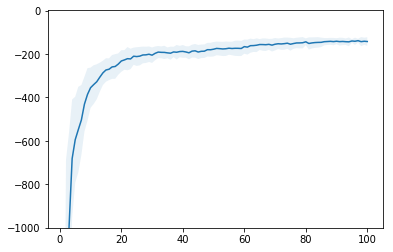

In [14]:
display(f) 
display(f2)

episodes = 100
repetitions = 100
y = np.zeros((episodes,repetitions))
j=0
f.value = 0
while j<repetitions:
    i = 0
    f2.value = 0
    #for G in imdp.Q_Lambda(.2,episodes,basis_matrix.shape[0],len(actions),action_id,.004,fourier_basis,imdp.delta_linear,myMDP):
    #for G in imdp.Q(episodes,basis_matrix.shape[0],len(actions),action_id,.004,fourier_basis,imdp.delta_linear,myMDP):
    for G in imdp.actor_critic(.001,.001,.1,episodes,basis_matrix.shape[0],len(actions),action_id,fourier_basis,myMDP):
        y[i,j] = G
        f2.value+=1
        i+=1
    f.value += 1 
    j+=1
std = np.std(y,axis = 1)
mean = np.mean(y,axis = 1)

plt.ylim(bottom=-1000)
plt.plot(range(1,101),np.mean(y,axis = 1))
plt.fill_between(range(1,101), mean-std, mean+std,alpha  = .1)

name = 'MOUNTAINCAR_ACTOR_CRITIC'
plt.savefig('results/'+name+'.jpg')

IntProgress(value=100)

IntProgress(value=100)

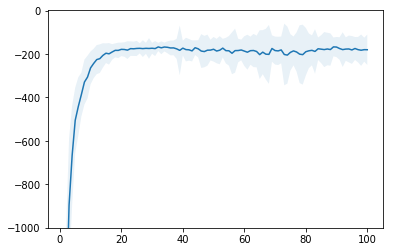

In [10]:
display(f) 
display(f2)

episodes = 100
repetitions = 100
y = np.zeros((episodes,repetitions))
j=0
f.value = 0
while j<repetitions:
    i = 0
    f2.value = 0
    for G in imdp.Q_Lambda(.2,episodes,basis_matrix.shape[0],len(actions),action_id,.004,fourier_basis,imdp.delta_linear,myMDP):
    #for G in imdp.Q(episodes,basis_matrix.shape[0],len(actions),action_id,.004,fourier_basis,imdp.delta_linear,myMDP):
    #for G in imdp.actor_critic(.001,.001,.1,episodes,basis_matrix.shape[0],len(actions),action_id,fourier_basis,myMDP):
        y[i,j] = G
        f2.value+=1
        i+=1
    f.value += 1 
    j+=1
std = np.std(y,axis = 1)
mean = np.mean(y,axis = 1)

plt.ylim(bottom=-1000)
plt.plot(range(1,101),np.mean(y,axis = 1))
plt.fill_between(range(1,101), mean-std, mean+std,alpha  = .1)

name = 'MOUNTAINCAR_Q_LAMBDA'
plt.savefig('results/'+name+'.jpg')


IntProgress(value=100)

IntProgress(value=100)

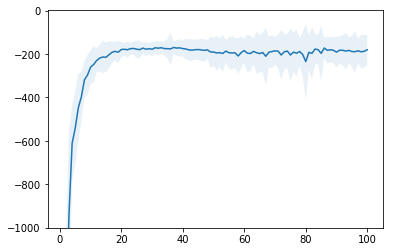

In [11]:
display(f) 
display(f2)

episodes = 100
repetitions = 100
y = np.zeros((episodes,repetitions))
j=0
f.value = 0
while j<repetitions:
    i = 0
    f2.value = 0
    for G in imdp.Sarsa_Lambda(.2,episodes,basis_matrix.shape[0],len(actions),action_id,.004,fourier_basis,imdp.delta_linear,myMDP):
    #for G in imdp.Q(episodes,basis_matrix.shape[0],len(actions),action_id,.004,fourier_basis,imdp.delta_linear,myMDP):
    #for G in imdp.actor_critic(.001,.001,.1,episodes,basis_matrix.shape[0],len(actions),action_id,fourier_basis,myMDP):
        y[i,j] = G
        f2.value+=1
        i+=1
    f.value += 1 
    j+=1
std = np.std(y,axis = 1)
mean = np.mean(y,axis = 1)

plt.ylim(bottom=-1000)
plt.plot(range(1,101),np.mean(y,axis = 1))
plt.fill_between(range(1,101), mean-std, mean+std,alpha  = .1)

name = 'MOUNTAINCAR_SARSA_LAMBDA'
plt.savefig('results/'+name+'.jpg')


IntProgress(value=100)

IntProgress(value=100)

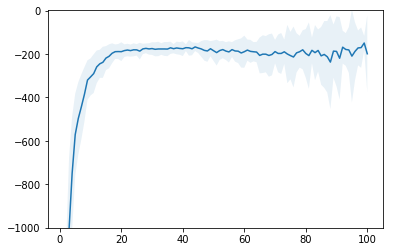

In [12]:
display(f) 
display(f2)

episodes = 100
repetitions = 100
y = np.zeros((episodes,repetitions))
j=0
f.value = 0
while j<repetitions:
    i = 0
    f2.value = 0
    #for G in imdp.Q_Lambda(.2,episodes,basis_matrix.shape[0],len(actions),action_id,.004,fourier_basis,imdp.delta_linear,myMDP):
    for G in imdp.Q(episodes,basis_matrix.shape[0],len(actions),action_id,.004,fourier_basis,imdp.delta_linear,myMDP):
    #for G in imdp.actor_critic(.001,.001,.1,episodes,basis_matrix.shape[0],len(actions),action_id,fourier_basis,myMDP):
        y[i,j] = G
        f2.value+=1
        i+=1
    f.value += 1 
    j+=1
std = np.std(y,axis = 1)
mean = np.mean(y,axis = 1)

plt.ylim(bottom=-1000)
plt.plot(range(1,101),np.mean(y,axis = 1))
plt.fill_between(range(1,101), mean-std, mean+std,alpha  = .1)

name = 'MOUNTAINCAR_Q'
plt.savefig('results/'+name+'.jpg')


IntProgress(value=100)

IntProgress(value=100)

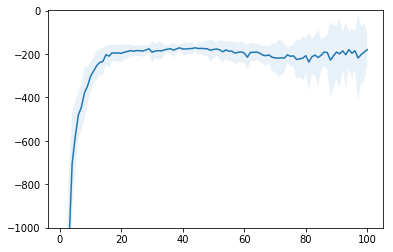

In [13]:
display(f) 
display(f2)

episodes = 100
repetitions = 100
y = np.zeros((episodes,repetitions))
j=0
f.value = 0
while j<repetitions:
    i = 0
    f2.value = 0
    #for G in imdp.Q_Lambda(.2,episodes,basis_matrix.shape[0],len(actions),action_id,.004,fourier_basis,imdp.delta_linear,myMDP):
    for G in imdp.Sarsa(episodes,basis_matrix.shape[0],len(actions),action_id,.004,fourier_basis,imdp.delta_linear,myMDP):
    #for G in imdp.actor_critic(.001,.001,.1,episodes,basis_matrix.shape[0],len(actions),action_id,fourier_basis,myMDP):
        y[i,j] = G
        f2.value+=1
        i+=1
    f.value += 1 
    j+=1
std = np.std(y,axis = 1)
mean = np.mean(y,axis = 1)

plt.ylim(bottom=-1000)
plt.plot(range(1,101),np.mean(y,axis = 1))
plt.fill_between(range(1,101), mean-std, mean+std,alpha  = .1)

name = 'MOUNTAINCAR_SARSA'
plt.savefig('results/'+name+'.jpg')
